
# <font color=orange>Estadística para Ciencia de Datos</font>
***

# 
# <font color=green>1. Estadistica Descriptiva </font>

## Tipos Básicos de Datos Estructurados  

- Numéricos: datos que pueden ser expresados como números enteros o decimales. Ej: edad, promedio notas, horas de estudio, etc 
- Categóricos: datos que pueden ser expresados como categorías (por ejemplo, género, etnia, estado civil)
- Binarios: datos que pueden ser expresados como 0 o 1
- Discretos: datos que pueden ser expresados como números enteros. Ej: ingreso familiar, número de hijos, número de amigos.  
- Continuos: datos que pueden ser expresados como números reales. Ej: Altura, peso, duración del estudio, etc. 
- Ordinal: datos que pueden ser expresados como números enteros que tienen un orden natural y pueden ser utilizados en análisis no paramétricos o transformados en datos numéricos para ciertos modelos. 
- Nominal: datos que pueden ser expresados como categorías sin un orden natural.
- Intervalos: datos que pueden ser expresados como números reales que tienen un rango natural y pueden ser utilizados en análisis paramétricos o transformados en datos numéricos para ciertos modelos.
      


# <font color=green>1.1 Estimaciones de Ubicación (o medidas de tendencia central)</font>

Cuando analizamos datos numéricos, es útil encontrar un "valor típico" que represente la tendencia central de los datos, es decir, un punto donde se concentra la mayor parte de la información.

## <font color=green>Términos Clave para Estimaciones de Ubicación</font>

Media: Es el promedio de todos los valores, calculado sumándolos y dividiéndolos por la cantidad total de valores.

Media ponderada: Similar a la media, pero algunos valores cuentan más que otros. Se calcula multiplicando cada valor por un peso y dividiendo la suma de estos por la suma de los pesos.

Mediana: El valor central que divide a los datos en dos mitades iguales.

Percentil: Indica la posición de un valor en relación al resto de los datos; por ejemplo, el percentil 50 es la mediana.

Media recortada: Promedio calculado después de eliminar los valores extremos para evitar su influencia.

Robusto: Se refiere a una medida que no se ve afectada por valores extremos o atípicos.

Valor atípico: Un valor que es significativamente diferente del resto de los datos.

Aunque la media es común y fácil de calcular, no siempre es la mejor opción. Los valores atípicos pueden influir demasiado en ella, por lo que existen otras medidas, como la mediana, que pueden ser más útiles en ciertos casos.

# <font color=green>Métricas y Estimaciones</font>

## <font color=violet>Media</font>
***


La media es la suma de todos los valores dividida por el número de valores. Ej:

$ \text{Media} = \frac{3 + 5 + 1 + 2}{4} = \frac{11}{4} = 2.75 $

Se representa por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [1]:
# Importamos librerías 
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
from scipy import stats 
import statsmodels.api as sm
import pingouin as pg

In [3]:
#Creo datos para los cálculos 
data = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])
print(data)

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9]})
display(df)

[ 3  5  1  2  7  8 10  6  4  9]


,values
0,3
1,5
2,1
3,2
4,7
5,8
6,10
7,6
8,4
9,9


**Ejemplos**

#### Con SciPy / Pandas / Statsmodels 

In [4]:
#MEDIA

# Scipy
mean_scipy = np.mean(data)
print("Media usando SciPy:", mean_scipy)

# Pandas
mean_pandas = df['values'].mean()
print("Media usando Pandas:", mean_pandas)

#Statsmodels 
# Agregar una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo de regresión sin variables explicativas, solo el intercepto
model = sm.OLS(df['values'], df['intercept']).fit()

# La media es el valor del intercepto
mean_statsmodels = model.params['intercept']
print("Media usando Statsmodels:", mean_statsmodels)

Media usando SciPy: 5.5
Media usando Pandas: 5.5
Media usando Statsmodels: 5.5


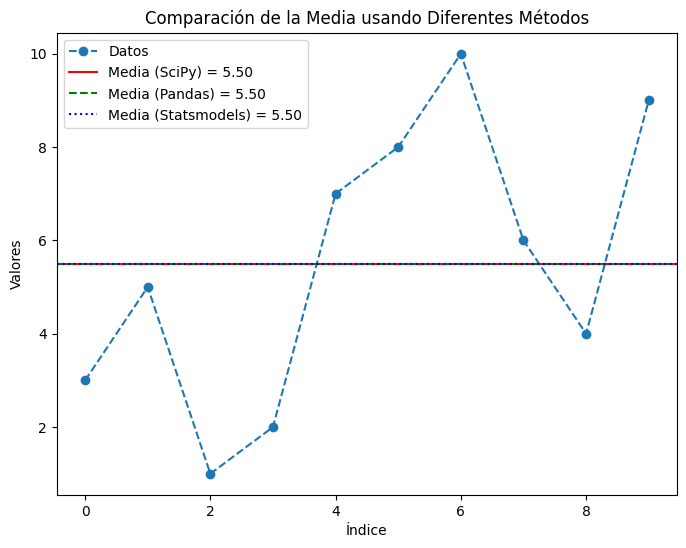

In [5]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(8, 6))
plt.plot(df['values'], label='Datos', marker='o', linestyle='--')

# Añadir líneas para las medias calculadas
plt.axhline(y=mean_scipy, color='r', linestyle='-', label=f'Media (SciPy) = {mean_scipy:.2f}')
plt.axhline(y=mean_pandas, color='g', linestyle='--', label=f'Media (Pandas) = {mean_pandas:.2f}')
plt.axhline(y=mean_statsmodels, color='b', linestyle=':', label=f'Media (Statsmodels) = {mean_statsmodels:.2f}')

# Añadir etiquetas y leyenda
plt.title('Comparación de la Media usando Diferentes Métodos')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()

# Mostrar el gráfico
plt.show()

## <font color=violet>Media recortada (trimmed mean)</font>
***

La media recortada es una medida de tendencia central que se utiliza para reducir el impacto de los valores extremos en el cálculo de la media. Al recortar un porcentaje de los valores más bajos y más altos, se obtiene una media más robusta y menos sensible a los outliers.

 Representando los valores ordenados por $x_1, x_2, \ldots, x_n$ donde $x_1$ es el valor más pequeño y $x_n$ el más grande, la fórmula para calcular la media recortada con $p$ valores más pequeños y más grandes omitidos es:


# $$\bar{x}_{\text{recortada}} = \frac{1}{n - 2p} \sum_{i=p+1}^{n-p} x_i$$

Una media recortada elimina la influencia de valores extremos. Por ejemplo, en el buceo internacional se eliminan la puntuación más alta y más baja de cinco jueces, y la puntuación final es el promedio de las puntuaciones de los tres jueces restantes. Esto hace que sea difícil para un solo juez manipular la puntuación, quizás para favorecer al concursante de su país. Las medias recortadas se utilizan ampliamente y, en muchos casos, son preferibles a usar la media ordinaria.

**Ejempos con Python**

#### SciPy

In [6]:
from scipy.stats import trim_mean

# Calcular la media recortada usando scipy
trimmed_mean_scipy = trim_mean(data, 0.1)  # Recorta el 10% de cada extremo
print("Media recortada con SciPy:", trimmed_mean_scipy)

# Calculate the trimmed mean with SciPy
trimmed_mean_scipy = stats.trim_mean(df['values'], proportiontocut=0.1)

print("Media recortada con SciPy:", trimmed_mean_scipy)

Media recortada con SciPy: 5.5
Media recortada con SciPy: 5.5


En este ejemplo, el conjunto de datos [3, 5, 1, 2, 7, 8, 10, 6, 4, 9] tiene una media de 5.5. Sin embargo, si se recorta el 10% de los valores más bajos y más altos, la media recortada sería diferente. En este caso, el valor más bajo (1) y el valor más alto (10) se recortarían, y la media recortada sería calculada utilizando los valores restantes.

#### Pandas

In [7]:
# Calcular la media recortada usando pandas
trimmed_df = df['values'].sort_values().iloc[int(0.1*len(df)):int(0.9*len(df))]
trimmed_mean_pandas = trimmed_df.mean()
print("Media recortada usando Pandas:", trimmed_mean_pandas)

Media recortada usando Pandas: 5.5


#### Statsmodels  

La función realiza los siguientes pasos:

Calcula la longitud del conjunto de datos (n).
Calcula el número de valores que se deben recortar de cada extremo (k) multiplicando la longitud del conjunto de datos por la proporción de valores que se deben recortar.
Ordena el conjunto de datos en orden ascendente utilizando la función np.sort.
Selecciona el rango de valores que se deben utilizar para calcular la media recortada, excluyendo los valores más bajos y más altos que se deben recortar.
Calcula la media de los valores seleccionados utilizando la función np.mean.

In [8]:
# Usar una función personalizada para calcular la media recortada
def trimmed_mean(data, proportiontocut):
    n = len(data)
    k = int(n * proportiontocut)
    trimmed_data = np.sort(data)[k:n-k]
    return np.mean(trimmed_data)

# Calcular la media recortada usando la función personalizada
trimmed_mean_statsmodels = trimmed_mean(df['values'], 0.1)
print("Media recortada usando una función personalizada con Statsmodels:", trimmed_mean_statsmodels)

Media recortada usando una función personalizada con Statsmodels: 5.5


## <font color=violet>Media ponderada</font>
***

Otro tipo de media es una `media ponderada (weighted mean)`, que se calcula multiplicando cada valor de datos $x_i$ por un peso especificado por el usuario $w_i$ y dividiendo su suma por la suma de los pesos. La fórmula para una media ponderada es:

# $$\bar{x}_w = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}$$

Hay dos motivaciones principales para usar una media ponderada:

- Algunos valores son intrínsecamente más variables que otros, y las observaciones altamente variables se les da un peso menor. Por ejemplo, si estamos tomando el promedio de múltiples sensores y uno de los sensores es menos preciso, entonces podríamos darle menos peso a los datos de ese sensor.
- Los datos recopilados no representan igualmente a los diferentes grupos que estamos interesados en medir. Por ejemplo, debido a la forma en que se realizó un experimento en línea, es posible que no tengamos un conjunto de datos que refleje con precisión todos los grupos en la base de usuarios. Para corregir eso, podemos dar un mayor peso a los valores de los grupos que estaban subrepresentados.

**Ejemplos con Python**

Vamos a utilizar un conjunto de datos simple donde cada valor tiene un peso asociado:

In [9]:
values = np.array([3, 5, 1, 2, 7, 8, 10, 6, 4, 9])
weights = np.array([1, 2, 1, 1, 2, 1, 3, 2, 1, 2])
# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [3, 5, 1, 2, 7, 8, 10, 6, 4, 9],
                   'weights': [1, 2, 1, 1, 2, 1, 3, 2, 1, 2]})

#### Scipy / Pandas / Statsmodels

calcula la media ponderada de un conjunto de datos utilizando tres bibliotecas diferentes: SciPy, Pandas y Statsmodels.

SciPy

Crea un conjunto de datos de ejemplo con valores y pesos.
Utiliza la función np.average para calcular la media ponderada, pasando los valores y pesos como argumentos.
Imprime la media ponderada.

Pandas

Crea un DataFrame de ejemplo con columnas para valores y pesos.
Utiliza la función np.average para calcular la media ponderada, pasando la columna de valores y la columna de pesos como argumentos.
Imprime la media ponderada.

Statsmodels

Añade una columna de unos al DataFrame para representar el intercepto.
Ajusta un modelo de regresión ponderado utilizando la función WLS de Statsmodels, pasando la columna de valores, la columna de intercepto y la columna de pesos como argumentos.
La media ponderada es el valor del intercepto en el modelo ajustado.
Imprime la media ponderada.

In [10]:
#Scipy
# Calcular la media ponderada usando scipy
weighted_mean_scipy = np.average(values, weights=weights)
print("Media ponderada usando SciPy:", weighted_mean_scipy)


# Pandas
# Calcular la media ponderada usando pandas
weighted_mean_pandas = np.average(df['values'], weights=df['weights'])
print("Media ponderada usando Pandas:", weighted_mean_pandas)

# Statsmodels
# Añadir una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo de regresión ponderado
model = sm.WLS(df['values'], df[['intercept']], weights=df['weights']).fit()

# La media ponderada es el valor del intercepto
weighted_mean_statsmodels = model.params['intercept']
print("Media ponderada usando Statsmodels:", weighted_mean_statsmodels)

# Pingouine
weighted_mean_pingouin = np.average(df['values'], weights=df['weights'])
print("Media ponderada usando Pingouin:", weighted_mean_pingouin)


Media ponderada usando SciPy: 6.375
Media ponderada usando Pandas: 6.375
Media ponderada usando Statsmodels: 6.375000000000003
Media ponderada usando Pingouin: 6.375


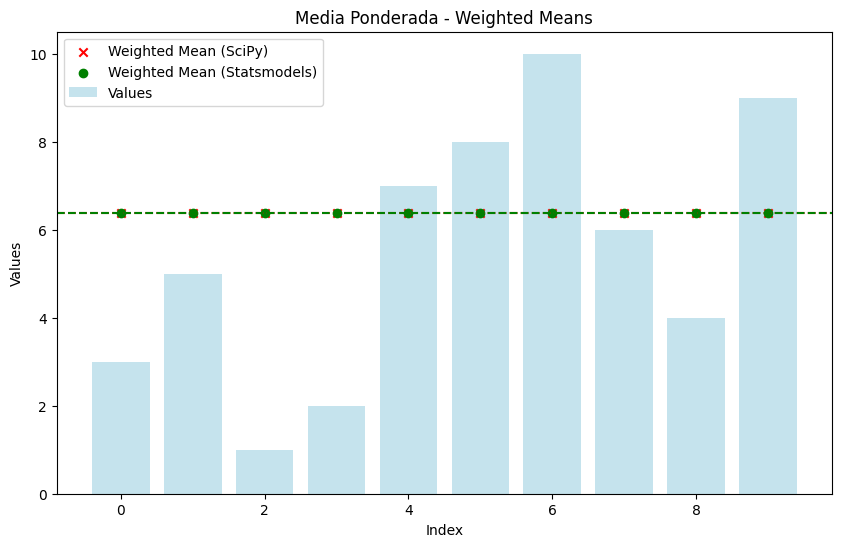

In [11]:
# Grafico
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['values'], color='lightblue', alpha=0.7, label='Values')
plt.scatter(df.index, [weighted_mean_scipy]*len(df), color='red', label='Weighted Mean (SciPy)', marker='x')
plt.scatter(df.index, [weighted_mean_statsmodels]*len(df), color='green', label='Weighted Mean (Statsmodels)', marker='o')
plt.axhline(y=weighted_mean_scipy, color='red', linestyle='--')
plt.axhline(y=weighted_mean_statsmodels, color='green', linestyle='--')
plt.legend()
plt.title('Media Ponderada - Weighted Means')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

## <font color=violet>Mediana y Estimaciones Robustas</font>
***

La mediana es una medida de tendencia central que se utiliza para describir la posición central de un conjunto de datos. A diferencia de la media, que se calcula sumando todos los valores y dividiéndolos por el número de observaciones, la mediana se basa en el valor central de los datos ordenados.

Ventajas de la mediana

La mediana tiene varias ventajas sobre la media:

Robustez frente a valores atípicos: La mediana no se ve afectada por valores extremos, como en el ejemplo de Bill Gates en Medina. La mediana sigue siendo la misma incluso si hay valores muy altos o muy bajos.
Independencia de la distribución: La mediana no depende de la forma de la distribución de los datos, lo que la hace más robusta que la media.
Facilidad de cálculo: La mediana es fácil de calcular, especialmente cuando los datos están ordenados.
Mediana ponderada

Al igual que la media ponderada, la mediana ponderada se utiliza cuando los datos tienen pesos asociados. La mediana ponderada se calcula ordenando los datos y encontrando el valor tal que la suma de los pesos es igual para las mitades inferior y superior de la lista ordenada.

Ventajas de la mediana ponderada

La mediana ponderada tiene las mismas ventajas que la mediana, además de:

Consideración de la importancia de cada observación: La mediana ponderada tiene en cuenta la importancia de cada observación, lo que la hace más representativa de la realidad.

**Ejemplos con Python**

#### SciPy (Numpy) / Pandas / Pingouine 

In [12]:

#Scipy
# Calcular la mediana usando numpy (parte de scipy)
median_scipy = np.median(data)
print("Mediana usando 'SciPy':", median_scipy)

#Statsmodels
# Ajustar un modelo de regresión cuantílica para calcular la mediana
quant_reg = sm.QuantReg(df['values'], np.ones(len(df['values'])))
res = quant_reg.fit(q=0.5)

# La mediana es el coeficiente del modelo
median_statsmodels = res.params[0]
print("Mediana usando Statsmodels:", median_statsmodels)

# Cálculo de la mediana usando Pandas
# Pandas
median_pandas = df['values'].median()
print("Mediana usando Pandas:", median_pandas)


Mediana usando 'SciPy': 5.5
Mediana usando Statsmodels: 5.499999999999998
Mediana usando Pandas: 5.5


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_19736\2155614543.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_statsmodels = res.params[0]


Statsmodels no tiene una función directa para calcular la mediana. Sin embargo, podemos usar una `regresión cuantílica` para calcularla, ya que la mediana es el cuantil 0.5.

## <font color=violet>Valores Atípicos</font>
***
Un valor atípico es un dato que se encuentra muy alejado de los demás valores en un conjunto de datos. Estos valores pueden ser resultado de errores de datos, como lecturas incorrectas de un sensor o mezcla de unidades de medida. Los valores atípicos pueden influir en la media, llevando a una mala estimación de la ubicación, mientras que la mediana es más robusta y no se ve afectada por estos valores extremos.

#### Detección de Anomalías

La detección de anomalías se enfoca en identificar los valores atípicos en un conjunto de datos. En este contexto, los valores atípicos son los puntos de interés, y la mayor parte de los datos se utiliza para definir lo "normal" contra lo cual se miden las anomalías. La detección de anomalías es importante en various campos, como la seguridad informática, la detección de fraude, y la monitorización de sistemas.

#### Estimaciones Robustas de la Ubicación

La mediana es una estimación robusta de la ubicación que no se ve influenciada por valores atípicos. Otra estimación robusta es la media recortada, que elimina un porcentaje determinado de los valores extremos (por ejemplo, el 10% inferior y superior) antes de calcular la media. La media recortada es un compromiso entre la mediana y la media, ya que es robusta frente a valores extremos, pero utiliza más datos para calcular la estimación de la ubicación.

#### Ejercicio 1: Estimaciones de Ubicación de la Población y las Tasas de Homicidios

La Tabla 1-2 muestra las primeras filas del conjunto de datos que contiene la población y las tasas de homicidios (en unidades de asesinatos por cada 100,000 personas por año) para cada estado de EE. UU. (Censo de 2010).

| Estado       | Población  | Tasa de Homicidios | Abreviatura |
|--------------|-------------|-------------------|-------------|
| Alabama      | 4,779,736   | 5.7               | AL          |
| Alaska       | 710,231     | 5.6               | AK          |
| Arizona      | 6,392,017   | 4.7               | AZ          |
| Arkansas     | 2,915,918   | 5.6               | AR          |
| California   | 37,253,956  | 4.4               | CA          |
| Colorado     | 5,029,196   | 2.8               | CO          |
| Connecticut  | 3,574,097   | 2.4               | CT          |
| Delaware     | 897,934     | 5.8               | DE          |

Calcula la media, la media recortada, la media ponderada y la mediana para la población usando Pandas, Scipy y Pingouine (Opcional: Statsmodels). Utilice el fichero `state.csv`

In [13]:
df=pd.read_csv('Datos/state87.csv')
df.head(4)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR


In [14]:
df.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [15]:
from pingouin import mwu

#MEDIA
# Uso Pandas
mean_pandas = df['Population'].mean()
print(f"Mean - Pandas: {mean_pandas:.2f}")

# Uso Scipy
mean_scipy = np.mean(df['Population'])
print(f"Mean - Scipy: {mean_scipy:.2f}")

# Using Pingouine
mean_pingouin = np.mean(df['Population'])
print(f"Mean - Pingouin (NumPy): {mean_pingouin:.2f}")

# Using Statsmodels
# Agregar una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo de regresión sin variables explicativas, solo el intercepto
model = sm.OLS(df['Population'], df['intercept']).fit()

# La media es el valor del intercepto
mean_statsmodels = model.params['intercept']
print("Mean - Statsmodels:", mean_statsmodels)

Mean - Pandas: 6162876.30
Mean - Scipy: 6162876.30
Mean - Pingouin (NumPy): 6162876.30
Mean - Statsmodels: 6162876.299999999


In [16]:
#MEDIA RECORTADA (trimmed mean 20%)
# Using Pandas
trimmed_mean_pop_pandas = df['Population'].quantile(0.5, interpolation='midpoint')
print(f"Trimmed mean (20% trimmed) - Pandas: {trimmed_mean_pop_pandas:.2f}")

# Using Scipy
trimmed_mean_pop_scipy = stats.trim_mean(df['Population'], proportiontocut=0.2)
print(f"Trimmed mean (20% trimmed) - Scipy: {trimmed_mean_pop_scipy:.2f}")

# Using Statsmodels
trimmed_mean_statsmodels = stats.trim_mean(df['Population'], proportiontocut=0.2)
print(f"Trimmed mean (20% trimmed) - Scipy (used instead of Statsmodels): {trimmed_mean_statsmodels:.2f}")

Trimmed mean (20% trimmed) - Pandas: 4436369.50
Trimmed mean (20% trimmed) - Scipy: 4413915.97
Trimmed mean (20% trimmed) - Scipy (used instead of Statsmodels): 4413915.97


In [17]:
#MEDIA PONDERADA
df['Weight'] = 1

# Usando Pandas
media_ponderada_pandas = (df['Population'] * df['Weight']).sum() / df['Weight'].sum()
print(f"Media ponderada - Pandas: {media_ponderada_pandas:.2f}")

# Usando Scipy
media_ponderada_scipy = np.average(df['Population'], weights=df['Weight'])
print(f"Media ponderada - Scipy: {media_ponderada_scipy:.2f}")

# Usando Pingouin (que se basa en NumPy y Scipy)
media_ponderada_pingouin = np.average(df['Population'], weights=df['Weight'])
print(f"Media ponderada - Pingouin (NumPy): {media_ponderada_pingouin:.2f}")

# Usando Statsmodels
# Añadir una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo de regresión ponderado
model = sm.WLS(df['Population'], df[['intercept']], weights=df['Weight']).fit()

# La media ponderada es el valor del intercepto
weighted_mean_statsmodels = model.params['intercept']
print(f"Media ponderada - Statsmodels (usando NumPy): {weighted_mean_statsmodels:.2f}")

Media ponderada - Pandas: 6162876.30
Media ponderada - Scipy: 6162876.30
Media ponderada - Pingouin (NumPy): 6162876.30
Media ponderada - Statsmodels (usando NumPy): 6162876.30


In [18]:
#MEDIANA
# Calcula la mediana con Pandas
mediana_pandas = df['Population'].median()
print("Mediana con Pandas:", mediana_pandas)

# Calcula la mediana con Scipy
mediana_numpy = np.median(df['Population'])
print("Mediana con numpy:", mediana_numpy)

# Calcula la mediana con Pingouine (no tiene una función específica para mediana, pero se puede calcular con numpy)
mediana_pingouine = np.median(df['Population'])
print("Mediana con Pingouine (numpy):", mediana_pingouine)

# Calcula la mediana con Statsmodels (no tiene una función específica para mediana, pero se puede calcular con numpy)
# Ajustar un modelo de regresión cuantílica para calcular la mediana
quant_reg = sm.QuantReg(df['Population'], np.ones(len(df['Population'])))
res = quant_reg.fit(q=0.5)

# La mediana es el coeficiente del modelo
median_statsmodels = res.params[0]
print("Mediana usando Statsmodels:", median_statsmodels)

Mediana con Pandas: 4436369.5
Mediana con numpy: 4436369.5
Mediana con Pingouine (numpy): 4436369.5
Mediana usando Statsmodels: 4531895.2390559


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_19736\3293632721.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_statsmodels = res.params[0]


#### Ejercicio 2. Investigar cómo se interpreta estadísticamente la medida de tendecia central: `moda`.  
Buscar ejemplos concretos donde se aplique la moda. Desarrolle un ejemplo con Pandas, Scipy, Statsmodels y Pingouine

La moda es una medida de tendencia central que se utiliza para describir el valor que se repite con más frecuencia en un conjunto de datos. Estadísticamente, la moda se interpreta como el valor que tiene la mayor frecuencia de aparición en un conjunto de datos [1].

Ventajas de la moda

No requiere cálculos
Puede usarse para datos tanto cuantitativos como cualitativos
Fácil de interpretar
No es sensible a los valores extremos (outliers)
Desventajas de la moda

Para conjuntos pequeños de datos su valor no tiene casi utilidad, si es que de hecho existe. Sólo tiene significado en el caso de una gran cantidad de datos.
No siempre existe, si los datos no se repiten
Difícil de interpretar si los datos tiene 3 o más modas
Ejemplos concretos

La moda se utiliza en la elección de un candidato político, ya que se busca al candidato que tenga la mayor cantidad de votos.
La moda se utiliza en la elección de un producto, ya que se busca al producto que tenga la mayor cantidad de ventas.

In [19]:
valores = [10, 2, 4, 5, 2, 1, 2, 3, 9, 49, 2, 4, 5]

#PANDAS
print(f"Pandas - Moda: {pd.Series(valores).mode().values[0]}") 

#SCIPY
print(f"Scipy - Moda: {stats.mode(valores).mode}")


Pandas - Moda: 2
Scipy - Moda: 2


### 1.2 Estimaciones de Variabilidad o medidas de variación

La variabilidad, también conocida como dispersión, es una dimensión fundamental en estadística que mide la dispersión de los valores de los datos.

## Términos Clave para Métricas de Variabilidad

 Hay varias formas de medir la variabilidad, incluyendo:

- Desviaciones (error absoluto): La diferencia entre los valores observados y la estimación de ubicación.
- Varianza (s²): La suma de las desviaciones al cuadrado con respecto a la media, dividida por n - 1.
- Desviación estándar: La raíz cuadrada de la varianza.
- Desviación absoluta media: La media de los valores absolutos de las desviaciones con respecto a la media.
- Desviación absoluta mediana desde la mediana: La mediana de los valores absolutos de las desviaciones con respecto a la mediana.
- Rango: La diferencia entre el valor más grande y el más pequeño en un conjunto de datos.
- Estadísticas de orden: Métricas basadas en los valores de los datos ordenados de menor a mayor.
- Percentil: El valor tal que P por ciento de los valores toman este valor o menos y (100 - P) por ciento toman este valor o más.
- Rango intercuartílico (IQR): La diferencia entre el percentil 75 y el percentil 25

## <font color=violet>Desviación Estándar y Estimaciones Relacionadas</font>
***

La desviación estándar y las estimaciones relacionadas miden la variabilidad de los datos basándose en las diferencias entre la estimación de la ubicación y los datos observados.

Las desviaciones son las diferencias entre los datos y la media o mediana.

### Desviación Absoluta Media

La desviación absoluta media es el promedio de los valores absolutos de las desviaciones con respecto a la media.

La fórmula para la desviación absoluta media es: (suma de los valores absolutos de las desviaciones) / número de datos.

Ejemplo: para el conjunto de datos {2, 1, 3}, la media es 2 y las desviaciones son {0, -1, 1}. La desviación absoluta media es (0 + 1 + 1) / 3 = 0.66

# $$\text{Desviación absoluta media} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n}$$

donde $\bar{x}$ es la media de la muestra.

> En resumen, la Desviación Absoluta Media es particularmente útil en situaciones donde se busca una medida de dispersión robusta, menos afectada por valores atípicos, y es una alternativa efectiva a la desviación estándar en contextos de análisis exploratorio, modelado predictivo, control de calidad, y análisis financiero.

### Ejemplos con Python

#### Con Scipy (Numpy) / Pandas / Statsmodels 

In [20]:
# Crear un conjunto de datos de ejemplo
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 100])
# Crear un DataFrame de ejemplo
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 100]})

In [21]:
#SCIPY
# Calcular la desviación absoluta media usando numpy (parte de scipy)
mean = np.mean(data)
mad_scipy = np.mean(np.abs(data - mean))
print("Desviación absoluta media usando SciPy:", mad_scipy)

#PANDAS 


# Calcular la desviación absoluta media usando pandas
mean = df['values'].mean()
mad_pandas = np.mean(np.abs(df['values'] - mean))
print("Desviación absoluta media usando Pandas:", mad_pandas)

#STATSMODELS
# Calcular la media
mean = df['values'].mean()

# Calcular la desviación absoluta media manualmente
mad_mean_statsmodels = np.mean(np.abs(df['values'] - mean))
print("Desviación absoluta media usando Statsmodels (manual):", mad_mean_statsmodels)

#PINGOUINE
# Calcular la desviación absoluta media usando Pingouin respecto a la media
mad_pingouin_manual = np.mean(np.abs(data - mean))
print("Desviación absoluta media usando Pingouin:", mad_pingouin_manual)


Desviación absoluta media usando SciPy: 18.864197530864196
Desviación absoluta media usando Pandas: 18.864197530864196
Desviación absoluta media usando Statsmodels (manual): 18.864197530864196
Desviación absoluta media usando Pingouin: 18.864197530864196


## <font color=violet>Varianza</font>
***

Varianza: Es una medida de dispersión que indica cuánto varían los datos respecto a su media (promedio). Se calcula promediando las desviaciones al cuadrado de cada valor respecto a la media. La fórmula es:

$
\text{Varianza} = s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$  

Pasos para Calcular la Varianza: 1.Calcular la Media: Es el promedio de todos los valores.   2.Calcular las Desviaciones al Cuadrado: Restar la media de cada valor y elevar al cuadrado la diferencia  3. Calcular la Varianza: Promediar las desviaciones al cuadrado.

### Interpretación de la Varianza

- Medida de Dispersión: Indica la variabilidad o dispersión de los datos en relación con la media. Una varianza mayor significa mayor dispersión.
- Sensibilidad a Outliers: Es sensible a valores atípicos, ya que las desviaciones al cuadrado amplifican el impacto de estos valores extremos.
- Unidades Cuadradas: La varianza se expresa en unidades al cuadrado, lo que puede dificultar la interpretación directa, a diferencia de la desviación estándar, que está en las mismas unidades que los datos originales.

#### Ejemplos en Python

#### Con Pandas

In [22]:
#PANDAS
# Calcular la varianza usando pandas
var_pandas = df['values'].var(ddof=0)  # ddof=0 para la varianza de la población
print("Varianza usando Pandas:", var_pandas)

#SCIPY
# Calcular la varianza usando scipy
var_scipy = stats.tvar(data, ddof=0)  # ddof=0 para la varianza de la población
print("Varianza usando SciPy:", var_scipy)

#STATSMODELS
# Calcular la media
mean = df['values'].mean()

# Calcular la varianza manualmente usando statsmodels
var_statsmodels = np.mean((df['values'] - mean) ** 2)
print("Varianza usando Statsmodels:", var_statsmodels)

Varianza usando Pandas: 905.4320987654321
Varianza usando SciPy: 905.4320987654321
Varianza usando Statsmodels: 905.4320987654321


## <font color=violet>Desviación estándar o típica</font>
***

# $$\text s = \sqrt{\text{Varianza}}$$

La desviación estándar mide la dispersión de los datos respecto a la media, y está en las mismas unidades que los datos, lo que facilita su interpretación. A diferencia de la varianza, que usa desviaciones al cuadrado, la desviación estándar se calcula como la raíz cuadrada de la varianza.

### Interpretación de la Desviación Estándar

- Medida de Dispersión: Mide cuánto se desvían los datos de la media. Mayor desviación estándar indica mayor dispersión.
- Comparabilidad: Está en las mismas unidades que los datos, facilitando su interpretación.
- Sensibilidad a Outliers: Similar a la varianza, es sensible a valores extremos debido al uso de desviaciones al cuadrado.

#### SciPy (Numpy) / Pandas /  Statsmodels 

In [23]:
# SCIPY 
# Calcular la desviación estándar usando numpy (parte de scipy)
std_dev_scipy = np.std(data, ddof=1)  # ddof=1 para una muestra
print("Desviación estándar usando SciPy:", std_dev_scipy)


#PANDAS
# Calcular la desviación estándar usando pandas
std_dev_pandas = df['values'].std()
print("Desviación estándar usando Pandas:", std_dev_pandas)


#STATSMODELS
# Agregar una columna de unos para representar el intercepto
df['intercept'] = 1

# Ajustar un modelo OLS (mínimos cuadrados ordinarios)
model = sm.OLS(df['values'], df['intercept']).fit()

# Calcular la desviación estándar de los residuales
residuals = model.resid
std_dev_statsmodels = np.std(residuals, ddof=1)  # ddof=1 para una muestra
print("Desviación estándar usando Statsmodels (de los residuales):", std_dev_statsmodels)


Desviación estándar usando SciPy: 31.915687539376478
Desviación estándar usando Pandas: 31.915687539376478
Desviación estándar usando Statsmodels (de los residuales): 31.915687539376478


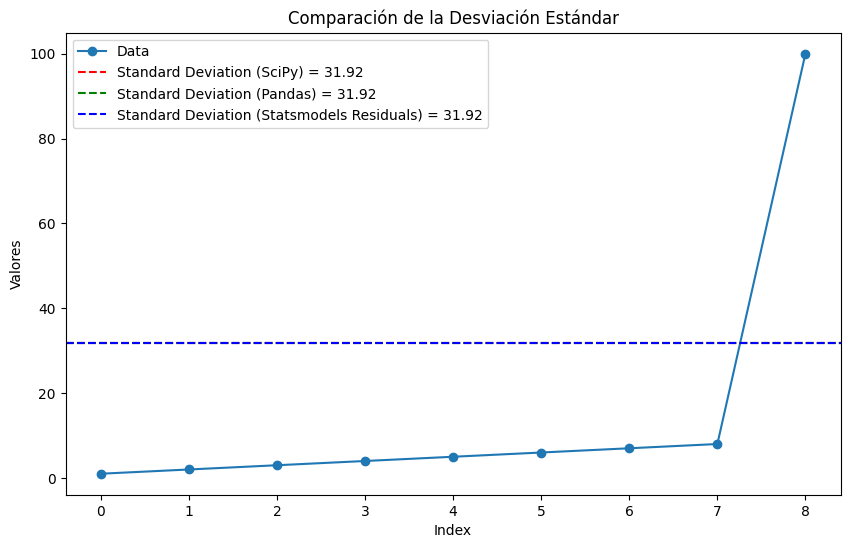

In [24]:
import matplotlib.pyplot as plt 

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Plot para el valor original de los datos
plt.plot(data, label='Data', marker='o', linestyle='-')

# Líneas horizontales para las desviaciones estándar
plt.axhline(y=std_dev_scipy, color='r', linestyle='--', label=f'Standard Deviation (SciPy) = {std_dev_scipy:.2f}')
plt.axhline(y=std_dev_pandas, color='g', linestyle='--', label=f'Standard Deviation (Pandas) = {std_dev_pandas:.2f}')
plt.axhline(y=std_dev_statsmodels, color='b', linestyle='--', label=f'Standard Deviation (Statsmodels Residuals) = {std_dev_statsmodels:.2f}')

plt.legend()
plt.title('Comparación de la Desviación Estándar') 
plt.xlabel('Index')
plt.ylabel('Valores')
plt.show()

## <font color=violet>Desviación absoluta mediana</font>
***

La Desviación Absoluta Mediana (MAD) es una medida robusta de variabilidad que no se ve afectada por valores atípicos, a diferencia de la varianza y la desviación estándar, que son sensibles a valores extremos.

Cálculo:
1. Calcular la Mediana (𝑚) de los datos.

2. Calcular las Desviaciones Absolutas desde la mediana: 
∣𝑥𝑖−𝑚∣

3.Obtener la Mediana de estas desviaciones absolutas.

MAD = Mediana(∣𝑥1−𝑚∣, ∣𝑥2−𝑚∣, .... ,∣𝑥N−𝑚∣)

### Interpretación

Robustez: A diferencia de la varianza y la desviación estándar, la MAD no se ve influenciada por valores extremos, lo que la hace útil para detectar outliers y entender la variabilidad de manera robusta.

Aplicación: Se utiliza para detectar outliers estableciendo un umbral; los valores que superan este umbral se consideran outliers.
Ejemplo: Si la MAD de un conjunto de datos es 2, indica que la dispersión de los datos alrededor de la mediana es relativamente baja, sin verse afectada por valores atípicos.

#### Ejemplos en Python

#### SciPy / Pandas / Statsmodels

In [25]:
# Crear un conjunto de datos de ejemplo
data = np.array([3, 1, 5, 3, 6, 7, 2, 9, 150])
df = pd.DataFrame({'values': data})

In [26]:
#SCIPY
# Calcular la mediana
median = np.median(data)

# Calcular la desviación absoluta mediana (MAD) usando numpy
mad_numpy = np.median(np.abs(data - median))
print("Desviación absoluta mediana usando NumPy:", mad_numpy)

#PANDAS 
# Calcular la mediana
median = df['values'].median()

# Calcular la desviación absoluta mediana (MAD) usando pandas
mad_pandas = np.median(np.abs(df['values'] - median))
print("Desviación absoluta mediana usando Pandas:", mad_pandas)


#STATSMODELS 
# Calcular la desviación absoluta mediana (MAD) usando statsmodels sin escala
mad_statsmodels = sm.robust.scale.mad(df['values'], c=1)
print("Desviación absoluta mediana usando Statsmodels:", mad_statsmodels)

Desviación absoluta mediana usando NumPy: 2.0
Desviación absoluta mediana usando Pandas: 2.0
Desviación absoluta mediana usando Statsmodels: 2.0


#### Detección de ouliers usando MAD (similar a z-score modificado)

##### Caso simple: Detección de outliers en precios de casas

#### Dataset:

In [27]:
data = {
    'precio_casa': [250000, 300000, 150000, 200000, 500000, 230000, 260000, 270000, 280000, 220000, 1000000]  
# Incluye un outlier: 1000000
}
df = pd.DataFrame(data)
print(df)

    precio_casa
0        250000
1        300000
2        150000
3        200000
4        500000
5        230000
6        260000
7        270000
8        280000
9        220000
10      1000000


**1- Calcular la Mediana y la Desviación Absoluta Mediana (MAD)**

In [28]:
# Calcular la mediana
mediana = df['precio_casa'].median()
print(f"Mediana del precio de las casas: {mediana}")

# Calcular la desviación absoluta mediana (MAD)
mad = np.median(np.abs(df['precio_casa'] - mediana))
print(f"Desviación absoluta mediana (MAD): {mad}")


Mediana del precio de las casas: 260000.0
Desviación absoluta mediana (MAD): 40000.0


**2-Detectar Outliers usando la MAD**

Establecemos un umbral basado en la MAD para detectar outliers. Un umbral común es **3 veces** la MAD.

In [29]:
# Establecer el umbral para detectar outliers
umbral = 3 * mad
print(f"Umbral para detectar outliers: {umbral}")

# Detectar outliers
outliers = df[np.abs(df['precio_casa'] - mediana) > umbral]
print("Outliers detectados usando MAD:")
display(outliers)

Umbral para detectar outliers: 120000.0
Outliers detectados usando MAD:


,precio_casa
4,500000
10,1000000


In [30]:
# Calcular la mediana
mediana = df['precio_casa'].median()
print("Mediana:", mediana)

# Calcular las desviaciones absolutas respecto a la mediana
desviaciones_absolutas = abs(df['precio_casa'] - mediana)
print("Desviaciones Absolutas:\n", desviaciones_absolutas.tolist())

# Calcular la mediana de las desviaciones absolutas
mad = desviaciones_absolutas.median()
print("MAD:", mad)

# Establecer umbral para detectar outliers (3 veces la MAD)
umbral = 3 * mad
print("Umbral:", umbral)

# Identificar valores que exceden el umbral
outliers = df[df['precio_casa'] > (mediana + umbral)]
print("Valores que exceden el umbral (Outliers):")
display(outliers)

Mediana: 260000.0
Desviaciones Absolutas:
 [10000.0, 40000.0, 110000.0, 60000.0, 240000.0, 30000.0, 0.0, 10000.0, 20000.0, 40000.0, 740000.0]
MAD: 40000.0
Umbral: 120000.0
Valores que exceden el umbral (Outliers):


,precio_casa
4,500000
10,1000000


## <font color=violet>Ajuste del Factor de Escala \( k \)</font>
***

El factor de escala 𝑘 en la detección de outliers define cuántas unidades de desviación estándar (o MAD) se consideran aceptables antes de clasificar un valor como atípico. Mientras que 𝑘=3 es una opción común basada en la distribución normal, ajustar 
𝑘 según la distribución y variabilidad de tus datos puede mejorar la precisión de la detección de outliers.

Consideremos un conjunto de datos de temperaturas diarias en una ciudad a lo largo de un año, con algunos días extremadamente cálidos o fríos que podrían ser considerados outliers.

In [31]:
# Crear un DataFrame de ejemplo con temperaturas
np.random.seed(0)
temperaturas = np.random.normal(loc=20, scale=5, size=365).tolist()  # Temperaturas normales
temperaturas.extend([40, 42, -10, -12])  # Añadir algunos outliers
data = {
    'temperatura': temperaturas
}
df = pd.DataFrame(data)
df

,temperatura
0,28.820262
1,22.000786
2,24.893690
3,31.204466
4,29.337790
...,...
364,19.921589
365,40.000000
366,42.000000
367,-10.000000


In [32]:
# Calcular la mediana
mediana = df['temperatura'].median()
print(f"Mediana de las temperaturas: {mediana}")

# Calcular la desviación absoluta mediana (MAD)
mad = np.median(np.abs(df['temperatura'] - mediana))
print(f"Desviación absoluta mediana (MAD): {mad}")

Mediana de las temperaturas: 19.73716351865227
Desviación absoluta mediana (MAD): 3.390552282976394


#### Ajuste del factor de $k$

Podemos utilizar técnicas exploratorias o basarnos en conocimientos específicos del dominio. En este ejemplo, ajustaremos 
𝑘 empíricamente.

In [33]:
# Ajustar el factor k empíricamente
for k in [1, 2, 3, 4, 5]:
    umbral = k * mad
    outliers = df[np.abs(df['temperatura'] - mediana) > umbral]
    display(f"Con k = {k}, el umbral es {umbral}. Outliers detectados:")
    display(outliers)


'Con k = 1, el umbral es 3.390552282976394. Outliers detectados:'

,temperatura
0,28.820262
2,24.893690
3,31.204466
4,29.337790
5,15.113611
...,...
362,24.659242
365,40.000000
366,42.000000
367,-10.000000


'Con k = 2, el umbral es 6.781104565952788. Outliers detectados:'

,temperatura
0,28.820262
3,31.204466
4,29.337790
11,27.271368
16,27.470395
...,...
356,10.784652
365,40.000000
366,42.000000
367,-10.000000


'Con k = 3, el umbral es 10.171656848929182. Outliers detectados:'

,temperatura
3,31.204466
20,7.235051
24,31.348773
144,31.915724
183,8.882984
198,30.816180
218,31.296545
271,6.137036
279,30.322464
292,31.519583


'Con k = 4, el umbral es 13.562209131905576. Outliers detectados:'

,temperatura
271,6.137036
365,40.000000
366,42.000000
367,-10.000000
368,-12.000000


'Con k = 5, el umbral es 16.95276141488197. Outliers detectados:'

,temperatura
365,40.0
366,42.0
367,-10.0
368,-12.0


>   **Ejercicio 3**. Con la misma dataset del ejercicio 2 (`state.csv`) calcule todas las medidas de dispersión dadas en esta en clase (incluyendo el cálculo del umbral para detectar outliers usando la desviación absoluta mediana) sobre la variable Población. Utilizar Pandas, Numpy y SciPy. Interpretar resultados.

In [34]:
df=pd.read_csv('Datos/state87.csv')

print(f'Las columnas son: {df.columns}')
display(df.head(4))

Las columnas son: Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR


**1- Calcular la Mediana y la Desviación Absoluta Mediana (MAD)**

In [35]:
# Calcular la mediana
mediana = df['Population'].median()
print(f"Mediana de la población: {mediana}")

# Calcular la desviación absoluta mediana (MAD)
mad = np.median(np.abs(df['Population'] - mediana))
print(f"Desviación absoluta mediana (MAD): {mad}")


Mediana de la población: 4436369.5
Desviación absoluta mediana (MAD): 2596702.0


**2-Detectar Outliers usando la MAD**

In [36]:
# Establecer el umbral para detectar outliers
umbral = 3 * mad
print(f"Umbral para detectar outliers: {umbral}")

# Detectar outliers
outliers = df[np.abs(df['Population'] - mediana) > umbral]
print("Outliers detectados usando MAD:")
display(outliers)

Umbral para detectar outliers: 7790106.0
Outliers detectados usando MAD:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
12,Illinois,12830632,5.3,IL
31,New York,19378102,3.1,NY
37,Pennsylvania,12702379,4.8,PA
42,Texas,25145561,4.4,TX


In [37]:
for k in [1, 2, 3, 4, 5]:
    umbral = k * mad
    outliers = df[np.abs(df['Population'] - mediana) > umbral]
    print(f"Con k = {k}, el umbral es {umbral}. Outliers detectados:")
    display(outliers)

Con k = 1, el umbral es 2596702.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
1,Alaska,710231,5.6,AK
4,California,37253956,4.4,CA
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA
10,Hawaii,1360301,1.8,HI
11,Idaho,1567582,2.0,ID
12,Illinois,12830632,5.3,IL
18,Maine,1328361,1.6,ME
21,Michigan,9883640,5.4,MI


Con k = 2, el umbral es 5193404.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA
12,Illinois,12830632,5.3,IL
21,Michigan,9883640,5.4,MI
31,New York,19378102,3.1,NY
34,Ohio,11536504,4.0,OH
37,Pennsylvania,12702379,4.8,PA
42,Texas,25145561,4.4,TX


Con k = 3, el umbral es 7790106.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
12,Illinois,12830632,5.3,IL
31,New York,19378102,3.1,NY
37,Pennsylvania,12702379,4.8,PA
42,Texas,25145561,4.4,TX


Con k = 4, el umbral es 10386808.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
31,New York,19378102,3.1,NY
42,Texas,25145561,4.4,TX


Con k = 5, el umbral es 12983510.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
31,New York,19378102,3.1,NY
42,Texas,25145561,4.4,TX


## <font color=violet>Estimaciones Basadas en Percentiles)</font>
***

Un enfoque diferente para estimar la dispersión se basa en observar la extensión de los datos ordenados. Las estadísticas basadas en datos ordenados (clasificados) se denominan `estadísticas de orden`. La medida más básica es el `rango`: la diferencia entre los números más grandes y más pequeños. Los valores mínimos y máximos en sí mismos son útiles y ayudan a identificar valores atípicos, pero el rango es extremadamente sensible a los valores atípicos y no es muy útil como una medida general de dispersión en los datos.  



Ejemplos en Python

#### Pandas

In [38]:
import pandas as pd

# Crear el DataFrame
data = [3, 1, 5, 3, 6, 7, 2, 9]
df = pd.DataFrame(data, columns=['values'])

# Calcular los percentiles 25, 50 y 75
p25 = df['values'].quantile(0.25)
p50 = df['values'].quantile(0.50)
p75 = df['values'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
iqr = p75 - p25

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuartílico (IQR): {iqr}")


Percentil 25 (P25): 2.75
Mediana (P50): 4.0
Percentil 75 (P75): 6.25
Rango Intercuartílico (IQR): 3.5


#### SciPy

In [39]:
import numpy as np
from scipy import stats

# Crear el array de datos
data = np.array([3, 1, 5, 3, 6, 7, 2, 9])

# Calcular los percentiles 25, 50 y 75
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

# Calcular el rango intercuartílico (IQR)
iqr = stats.iqr(data)

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuartílico (IQR): {iqr}")

Percentil 25 (P25): 2.75
Mediana (P50): 4.0
Percentil 75 (P75): 6.25
Rango Intercuartílico (IQR): 3.5


#### Statsmodels

In [40]:
import numpy as np
import statsmodels.api as sm

# Crear el array de datos
data = np.array([3, 1, 5, 3, 6, 7, 2, 9])

# Calcular los percentiles 25, 50 y 75 usando numpy
p25, p50, p75 = np.percentile(data, [25, 50, 75])

# Calcular el rango intercuartílico (IQR) manualmente
iqr = p75 - p25

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuartílico (IQR): {iqr}")


Percentil 25 (P25): 2.75
Mediana (P50): 4.0
Percentil 75 (P75): 6.25
Rango Intercuartílico (IQR): 3.5


### Características de los Percentiles

#### Independencia de la Distribución

Los percentiles son una medida no paramétrica, lo que significa que no dependen de la forma de la distribución de los datos. Pueden ser utilizados para describir cualquier conjunto de datos, independientemente de su distribución.

#### Robustez frente a Valores Atípicos

Los percentiles no son tan sensibles a los valores atípicos como otras medidas de dispersión, como la varianza y la desviación estándar. Esto los hace útiles en distribuciones con outliers o distribuciones sesgadas.

#### Descriptivos de Posición

Los percentiles proporcionan una descripción clara de la posición de un dato en el contexto del conjunto de datos. Por ejemplo, el percentil 50 (la mediana) indica el punto medio de los datos.

## <font color=violet>Interpretación Estadística</font>
***

### <font color=violet>Distribución Normal</font>


Los percentiles muestran la simetría de la distribución alrededor de la mediana.

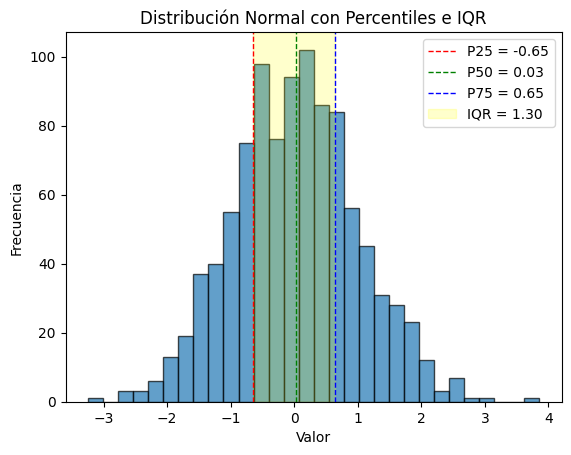

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos para una distribución normal
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Calcular los percentiles 25, 50 y 75
Q1 = np.percentile(data_normal, 25)
Q2 = np.percentile(data_normal, 50)  # Mediana
Q3 = np.percentile(data_normal, 75)

# Calcular el IQR
IQR = Q3 - Q1

# Crear el histograma
plt.hist(data_normal, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1:.2f}')
plt.axvline(Q2, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3:.2f}')

# Mostrar el IQR
plt.axvspan(Q1, Q3, alpha=0.2, color='yellow', label=f'IQR = {IQR:.2f}')

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución Normal con Percentiles e IQR')
plt.legend()

# Mostrar el gráfico
plt.show()


### <font color=violet>Distribución Sesgada</font>

La mediana es una mejor medida de la tendencia central que la media, y el rango intercuartílico proporciona una buena medida de la dispersión.

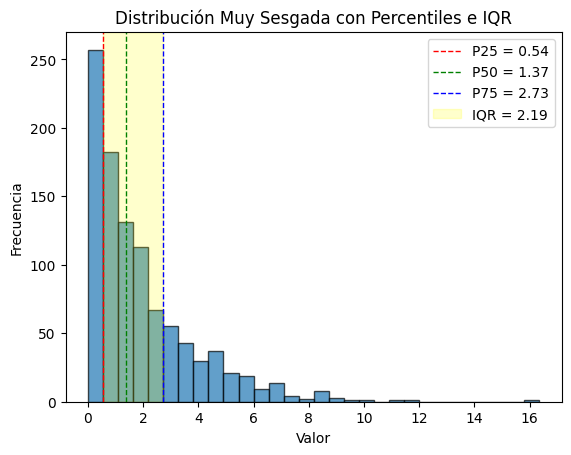

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos para una distribución muy sesgada (exponencial)
data_skewed = np.random.exponential(scale=2, size=1000)

# Calcular los percentiles 25, 50 y 75
Q1 = np.percentile(data_skewed, 25)
Q2 = np.percentile(data_skewed, 50)  # Mediana
Q3 = np.percentile(data_skewed, 75)

# Calcular el IQR
IQR = Q3 - Q1

# Crear el histograma
plt.hist(data_skewed, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1:.2f}')
plt.axvline(Q2, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3:.2f}')

# Mostrar el IQR
plt.axvspan(Q1, Q3, alpha=0.2, color='yellow', label=f'IQR = {IQR:.2f}')

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución Muy Sesgada con Percentiles e IQR')
plt.legend()

# Mostrar el gráfico
plt.show()


### <font color=violet>Distribución Multimodal</font>

Los percentiles ayudan a entender cómo se distribuyen los datos en torno a los diferentes modos.

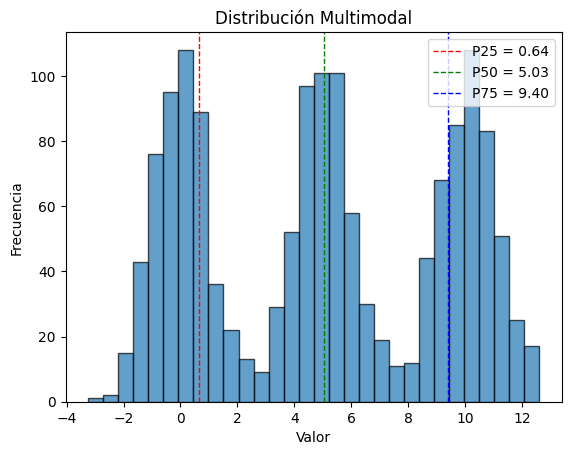

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos multimodales
data1 = np.random.normal(loc=0, scale=1, size=500)
data2 = np.random.normal(loc=5, scale=1, size=500)
data3 = np.random.normal(loc=10, scale=1, size=500)

# Combinar los datos
data = np.concatenate([data1, data2, data3])

# Calcular los percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

# Crear el histograma
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(p25, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {p25:.2f}')
plt.axvline(p50, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {p50:.2f}')
plt.axvline(p75, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {p75:.2f}')

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución Multimodal')
plt.legend()

# Mostrar el gráfico
plt.show()


## <font color=violet>Boxplots</font>
***

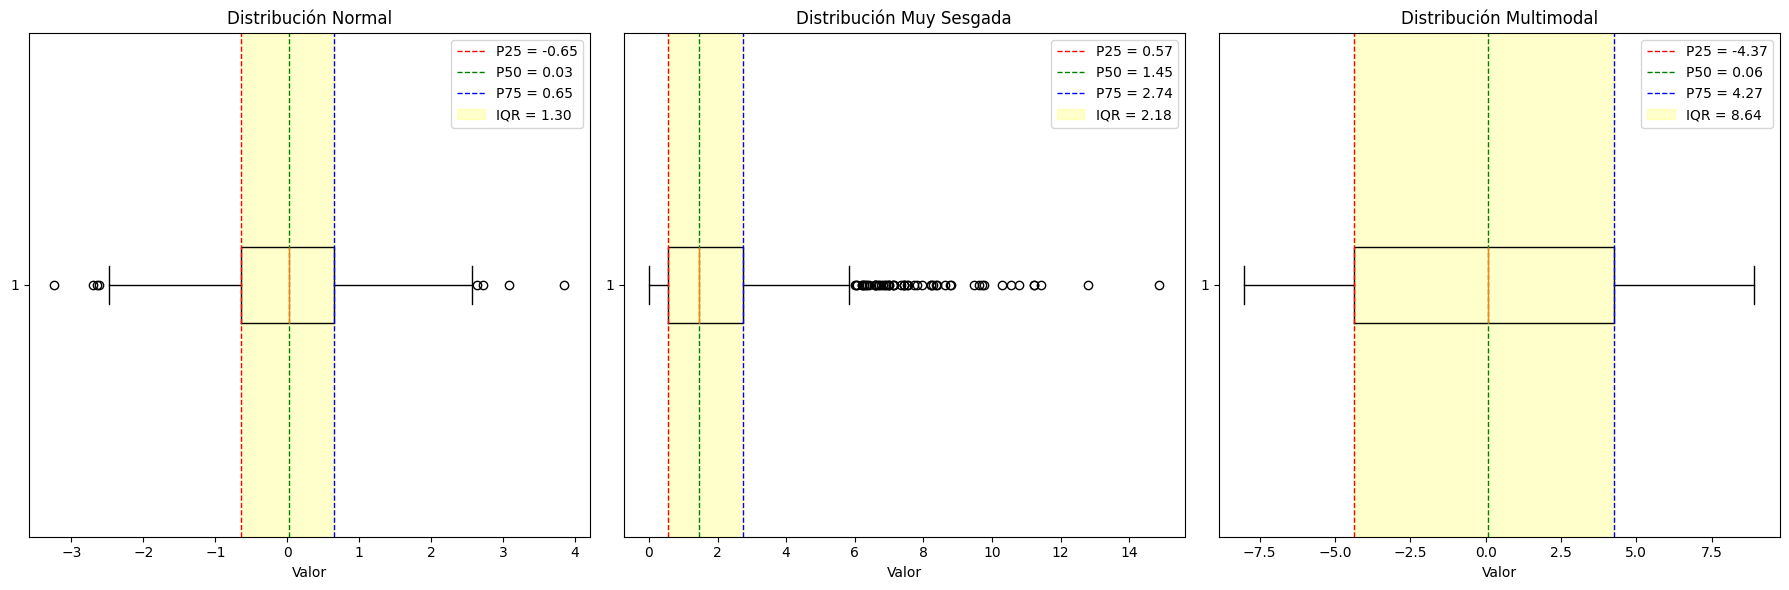

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
# Distribución Normal
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Distribución Muy Sesgada (Exponencial)
data_skewed = np.random.exponential(scale=2, size=1000)

# Distribución Multimodal más pronunciada
data1 = np.random.normal(loc=-5, scale=1, size=500)
data2 = np.random.normal(loc=0, scale=1, size=500)
data3 = np.random.normal(loc=5, scale=1, size=500)
data_multimodal = np.concatenate([data1, data2, data3])

# Calcular percentiles y IQR para cada distribución
def calculate_iqr_percentiles(data):
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)  # Mediana
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    return Q1, Q2, Q3, IQR

Q1_normal, Q2_normal, Q3_normal, IQR_normal = calculate_iqr_percentiles(data_normal)
Q1_skewed, Q2_skewed, Q3_skewed, IQR_skewed = calculate_iqr_percentiles(data_skewed)
Q1_multimodal, Q2_multimodal, Q3_multimodal, IQR_multimodal = calculate_iqr_percentiles(data_multimodal)

# Crear los boxplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para la Distribución Normal
axs[0].boxplot(data_normal, vert=False)
axs[0].axvline(Q1_normal, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1_normal:.2f}')
axs[0].axvline(Q2_normal, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2_normal:.2f}')
axs[0].axvline(Q3_normal, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3_normal:.2f}')
axs[0].axvspan(Q1_normal, Q3_normal, alpha=0.2, color='yellow', label=f'IQR = {IQR_normal:.2f}')
axs[0].set_title('Distribución Normal')
axs[0].set_xlabel('Valor')
axs[0].legend()

# Boxplot para la Distribución Muy Sesgada
axs[1].boxplot(data_skewed, vert=False)
axs[1].axvline(Q1_skewed, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1_skewed:.2f}')
axs[1].axvline(Q2_skewed, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2_skewed:.2f}')
axs[1].axvline(Q3_skewed, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3_skewed:.2f}')
axs[1].axvspan(Q1_skewed, Q3_skewed, alpha=0.2, color='yellow', label=f'IQR = {IQR_skewed:.2f}')
axs[1].set_title('Distribución Muy Sesgada')
axs[1].set_xlabel('Valor')
axs[1].legend()

# Boxplot para la Distribución Multimodal
axs[2].boxplot(data_multimodal, vert=False)
axs[2].axvline(Q1_multimodal, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {Q1_multimodal:.2f}')
axs[2].axvline(Q2_multimodal, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {Q2_multimodal:.2f}')
axs[2].axvline(Q3_multimodal, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {Q3_multimodal:.2f}')
axs[2].axvspan(Q1_multimodal, Q3_multimodal, alpha=0.2, color='yellow', label=f'IQR = {IQR_multimodal:.2f}')
axs[2].set_title('Distribución Multimodal')
axs[2].set_xlabel('Valor')
axs[2].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


>  **Ejercicio 4** Con la misma dataset de los ejercicios anteriores (`states.csv`), calcular los percentiles 25, 50 y 75. Calcular tambien el rango y el IQR para la variable población. Calcular/detectar outliers usando MAD y usando el criterio de Tukey (investigar)  

In [48]:
state=pd.read_csv('Datos/state87.csv')
print(state.columns)
state.head(4)

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR


Calcular los percentiles 25, 50 y 75. Calcular tambien el rango y el IQR para la variable población.

In [49]:
# Calcular los percentiles 25, 50 y 75
p25 = state['Population'].quantile(0.25)
p50 = state['Population'].quantile(0.50)
p75 = state['Population'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
iqr = p75 - p25

print(f"Percentil 25 (P25): {p25}")
print(f"Mediana (P50): {p50}")
print(f"Percentil 75 (P75): {p75}")
print(f"Rango Intercuartílico (IQR): {iqr}")

Percentil 25 (P25): 1833004.25
Mediana (P50): 4436369.5
Percentil 75 (P75): 6680312.25
Rango Intercuartílico (IQR): 4847308.0


Calcular/detectar outliers usando MAD

In [50]:
# Calcular la mediana
mediana = state['Population'].median()
print(f"Mediana: {mediana}")

# Calcular la desviación absoluta mediana (MAD)
mad = np.median(np.abs(state['Population'] - mediana))
print(f"Desviación absoluta mediana (MAD): {mad}")

Mediana: 4436369.5
Desviación absoluta mediana (MAD): 2596702.0


In [51]:
# Ajustar el factor k empíricamente
for k in [1, 2, 3, 4, 5]:
    umbral = k * mad
    outliers = state[np.abs(state['Population'] - mediana) > umbral]
    print(f"Con k = {k}, el umbral es {umbral}. Outliers detectados:")
    display(outliers)

Con k = 1, el umbral es 2596702.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
1,Alaska,710231,5.6,AK
4,California,37253956,4.4,CA
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA
10,Hawaii,1360301,1.8,HI
11,Idaho,1567582,2.0,ID
12,Illinois,12830632,5.3,IL
18,Maine,1328361,1.6,ME
21,Michigan,9883640,5.4,MI


Con k = 2, el umbral es 5193404.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA
12,Illinois,12830632,5.3,IL
21,Michigan,9883640,5.4,MI
31,New York,19378102,3.1,NY
34,Ohio,11536504,4.0,OH
37,Pennsylvania,12702379,4.8,PA
42,Texas,25145561,4.4,TX


Con k = 3, el umbral es 7790106.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
12,Illinois,12830632,5.3,IL
31,New York,19378102,3.1,NY
37,Pennsylvania,12702379,4.8,PA
42,Texas,25145561,4.4,TX


Con k = 4, el umbral es 10386808.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
31,New York,19378102,3.1,NY
42,Texas,25145561,4.4,TX


Con k = 5, el umbral es 12983510.0. Outliers detectados:


,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
8,Florida,18801310,5.8,FL
31,New York,19378102,3.1,NY
42,Texas,25145561,4.4,TX


Realizar dos gráficos. El primero: Un histograma que muestre los percentiles y el IQR. 

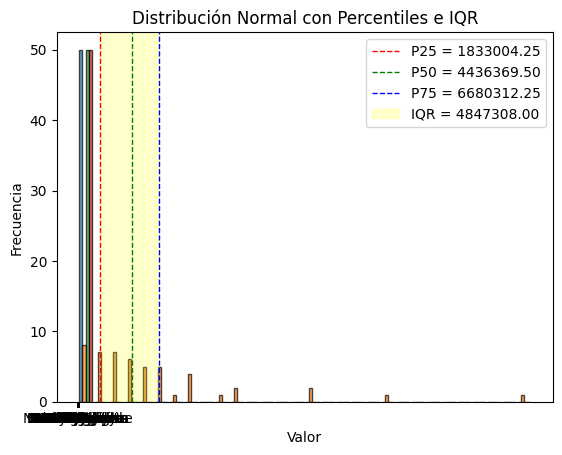

In [52]:
# Crear el histograma
plt.hist(state, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(p25, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {p25:.2f}')
plt.axvline(p50, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {p50:.2f}')
plt.axvline(p75, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {p75:.2f}')

# Mostrar el IQR
plt.axvspan(p25, p75, alpha=0.2, color='yellow', label=f'IQR = {iqr:.2f}')

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución Normal con Percentiles e IQR')
plt.legend()

# Mostrar el gráfico
plt.show()

El segundo gráfico un boxplot (diagrama de caja y bigote) que muestre los outliers. 

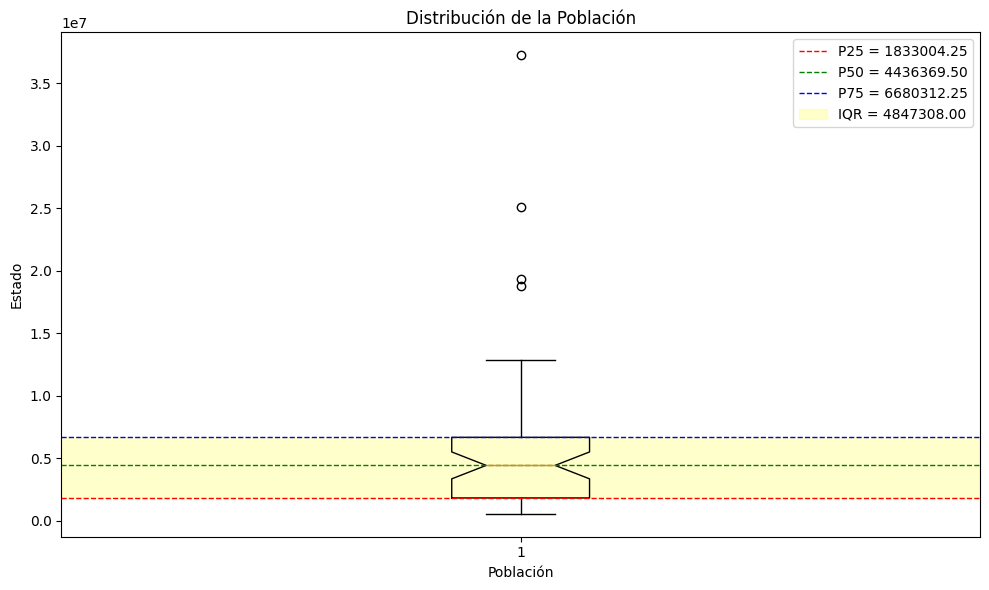

In [53]:
# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Crear el boxplot vertical (por defecto)
plt.boxplot(state['Population'], notch=True, vert=True)

# Añadir líneas verticales para los percentiles
plt.axhline(p25, color='r', linestyle='dashed', linewidth=1, label=f'P25 = {p25:.2f}')
plt.axhline(p50, color='g', linestyle='dashed', linewidth=1, label=f'P50 = {p50:.2f}')
plt.axhline(p75, color='b', linestyle='dashed', linewidth=1, label=f'P75 = {p75:.2f}')
plt.axhspan(p25, p75, alpha=0.2, color='yellow', label=f'IQR = {iqr:.2f}')

# Personalizar el gráfico
plt.title('Distribución de la Población')
plt.xlabel('Población')
plt.ylabel('Estado')  # Suponiendo que tienes una columna 'State'
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar espacios si es necesario
plt.show()

# <font color=green>Explorando la Distribución de los Datos</font>
***

## <font color=violet>Percentiles y Diagramas de Caja</font>
***

En la sección anterior, exploramos cómo los percentiles pueden usarse para medir la dispersión de los datos. Los percentiles también son valiosos para resumir la distribución completa. Es común reportar los cuartiles (percentiles 25, 50 y 75) y los deciles (percentiles 10, 20, ..., 90). Los percentiles son especialmente valiosos para resumir los extremos (la gama exterior) de la distribución. La cultura popular ha acuñado el término "one-percenters" para referirse a las personas en el percentil 99 superior de riqueza.

La Tabla 1-4 muestra algunos percentiles de la tasa de asesinatos por estado.

```python
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])


| 5%   | 25%  | 50%  | 75%  | 95%  |
|------|------|------|------|------|
| 1.60 | 2.42 | 4.00 | 5.55 | 6.51 |


La mediana es de 4 asesinatos por cada 100,000 personas, aunque hay bastante variabilidad: el percentil 5 es solo 1.6 y el percentil 95 es 6.51.

Los diagramas de caja, introducidos por Tukey, se basan en percentiles y ofrecen una forma rápida de visualizar la distribución de los datos. La Figura 1-2 muestra un diagrama de caja de la población por estado.


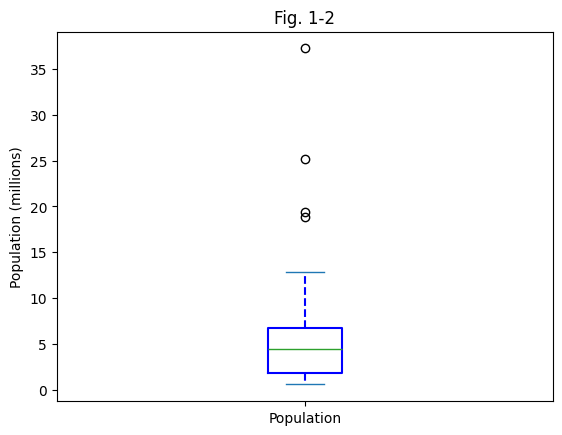

In [54]:
boxprops = dict(linestyle='-', linewidth=1.5, color='blue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='blue')
ax = (state['Population'] / 1_000_000).plot.box(boxprops=boxprops, whiskerprops=whiskerprops)
ax.set_ylabel('Population (millions)')
ax.set_title('Fig. 1-2')
plt.show()

A partir de este diagrama de caja, podemos ver inmediatamente que la mediana de la población estatal es de aproximadamente 5 millones, la mitad de los estados se encuentran entre aproximadamente 2 millones y 7 millones, y hay algunos outliers con alta población. La parte superior e inferior de la caja son los percentiles 75 y 25, respectivamente. La mediana se muestra mediante la línea horizontal en la caja. Las líneas discontinuas, denominadas "bigotes", se extienden desde la parte superior e inferior de la caja para indicar el rango de la mayor parte de los datos. 


## <font color=violet>Tablas de Frecuencia e Histogramas</font>
***

Una tabla de frecuencia de una variable divide el rango de la variable en intervalos igualmente espaciados y nos dice cuántos valores caen dentro de cada intervalo. La siguiente serie muestra los intervalos junto al conteo de estados.

In [55]:
binnedPopulation = pd.cut(state['Population'], 10)
population_counts = binnedPopulation.value_counts()
population_counts   

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

> **Ejercicio 5**. Convertir la serie de arriba en un dataframe con indices enteros

In [57]:
df_state = population_counts.reset_index()
display(df_state.head()) 


if len(df_state.columns) == 2:
    df_state.columns = ['Population Range', 'Count']
else:
    print(f"El DataFrame tiene {len(df_state.columns)} columnas. No se puede renombrar.")

df = df_state.reset_index(drop=True)
display(df_state)

,Population,count
0,"(526935.67, 4232659.0]",24
1,"(4232659.0, 7901692.0]",14
2,"(7901692.0, 11570725.0]",6
3,"(11570725.0, 15239758.0]",2
4,"(15239758.0, 18908791.0]",1


,Population Range,Count
0,"(526935.67, 4232659.0]",24
1,"(4232659.0, 7901692.0]",14
2,"(7901692.0, 11570725.0]",6
3,"(11570725.0, 15239758.0]",2
4,"(15239758.0, 18908791.0]",1
5,"(18908791.0, 22577824.0]",1
6,"(22577824.0, 26246857.0]",1
7,"(33584923.0, 37253956.0]",1
8,"(26246857.0, 29915890.0]",0
9,"(29915890.0, 33584923.0]",0


In [58]:
binnedPopulation = pd.cut(state['Population'], 20)
binnedPopulation.value_counts()

Population
(526935.67, 2398142.5]      15
(4232659.0, 6067175.5]       9
(2398142.5, 4232659.0]       9
(6067175.5, 7901692.0]       5
(7901692.0, 9736208.5]       4
(9736208.5, 11570725.0]      2
(11570725.0, 13405241.5]     2
(17074274.5, 18908791.0]     1
(24412340.5, 26246857.0]     1
(18908791.0, 20743307.5]     1
(35419439.5, 37253956.0]     1
(15239758.0, 17074274.5]     0
(20743307.5, 22577824.0]     0
(22577824.0, 24412340.5]     0
(13405241.5, 15239758.0]     0
(26246857.0, 28081373.5]     0
(28081373.5, 29915890.0]     0
(29915890.0, 31750406.5]     0
(31750406.5, 33584923.0]     0
(33584923.0, 35419439.5]     0
Name: count, dtype: int64

La Tabla 1-5 muestra una tabla de frecuencia de la población por estado:

| BinNumber | BinRange                 | Count | States                                                                                       |
|-----------|--------------------------|-------|----------------------------------------------------------------------------------------------|
| 1         | (526935.67, 4232659.0]   | 24    | Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming, Oklahoma, Oregon |
| 2         | (4232659.0, 7901692.0]   | 14    | Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin, Massachusetts |
| 3         | (7901692.0, 11570725.0]  | 6     | Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia                                                                       |
| 4         | (11570725.0, 15239758.0] | 2     | Illinois, Pennsylvania                                                                                       |
| 5         | (15239758.0, 18908791.0] | 1     | Florida                                                                                           |
| 6         | (18908791.0, 22577824.0] | 1     | New York                                                                                           |
| 7         | (22577824.0, 26246857.0] | 1     | Texas                                                                                           |
| 8         | (33584923.0, 37253956.0] | 1     | California                                                                                           |
| 9         | (26246857.0, 29915890.0] | 0     |                                                                                              |
| 10        | (29915890.0, 33584923.0] | 0     |                                                                                              |


> **Ejercicio 6**. Utilice Pandas para obtener la tabla 1-5 dada arriba.

In [62]:
# Crear la tabla en formato de texto
table_text = """
| BinNumber | BinRange                 | Count | States                                                                                       |
|-----------|--------------------------|-------|----------------------------------------------------------------------------------------------|
| 1         | (526935.67, 4232659.0]   | 24    | Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming, Oklahoma, Oregon |
| 2         | (4232659.0, 7901692.0]   | 14    | Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin, Massachusetts |
| 3         | (7901692.0, 11570725.0]  | 6     | Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia                                                                       |
| 4         | (11570725.0, 15239758.0] | 2     | Illinois, Pennsylvania                                                                                       |
| 5         | (15239758.0, 18908791.0] | 1     | Florida                                                                                           |
| 6         | (18908791.0, 22577824.0] | 1     | New York                                                                                           |
| 7         | (22577824.0, 26246857.0] | 1     | Texas                                                                                           |
| 8         | (33584923.0, 37253956.0] | 1     | California                                                                                           |
| 9         | (26246857.0, 29915890.0] | 0     |                                                                                              |
| 10        | (29915890.0, 33584923.0] | 0     |                                                                                              |
"""

# Imprimir la tabla
print(table_text)



| BinNumber | BinRange                 | Count | States                                                                                       |
|-----------|--------------------------|-------|----------------------------------------------------------------------------------------------|
| 1         | (526935.67, 4232659.0]   | 24    | Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming, Oklahoma, Oregon |
| 2         | (4232659.0, 7901692.0]   | 14    | Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin, Massachusetts |
| 3         | (7901692.0, 11570725.0]  | 6     | Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia                                                                       |
| 4         | (11570725.0, 1523

In [64]:
# Crear los datos de la tabla
data = {
    'BinNumber': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'BinRange': [
        '(526935.67, 4232659.0]', '(4232659.0, 7901692.0]', 
        '(7901692.0, 11570725.0]', '(11570725.0, 15239758.0]', 
        '(15239758.0, 18908791.0]', '(18908791.0, 22577824.0]', 
        '(22577824.0, 26246857.0]', '(33584923.0, 37253956.0]', 
        '(26246857.0, 29915890.0]', '(29915890.0, 33584923.0]'
    ],
    'Count': [24, 14, 6, 2, 1, 1, 1, 1, 0, 0],
    'States': [
        'Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming, Oklahoma, Oregon',
        'Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin, Massachusetts',
        'Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia',
        'Illinois, Pennsylvania',
        'Florida',
        'New York',
        'Texas',
        'California',
        '',
        ''
    ]
}

df = pd.DataFrame(data)
display(df)


,BinNumber,BinRange,Count,States
0,1,"(526935.67, 4232659.0]",24,"Alaska, Arkansas, Connecticut, Delaware, Hawai..."
1,2,"(4232659.0, 7901692.0]",14,"Alabama, Arizona, Colorado, Indiana, Kentucky,..."
2,3,"(7901692.0, 11570725.0]",6,"Georgia, Michigan, New Jersey, North Carolina,..."
3,4,"(11570725.0, 15239758.0]",2,"Illinois, Pennsylvania"
4,5,"(15239758.0, 18908791.0]",1,Florida
5,6,"(18908791.0, 22577824.0]",1,New York
6,7,"(22577824.0, 26246857.0]",1,Texas
7,8,"(33584923.0, 37253956.0]",1,California
8,9,"(26246857.0, 29915890.0]",0,
9,10,"(29915890.0, 33584923.0]",0,


El estado menos poblado es Wyoming, con 563,626 personas, y el más poblado es California, con 37,253,956 personas. Esto nos da un rango de 37,253,956 – 563,626 = 36,690,330, que debemos dividir en bins de tamaño igual—digamos 10 bins. Con 10 bins de tamaño igual, cada bin tendrá un ancho de 3,669,033, por lo que el primer bin abarcará de 563,626 a 4,232,658. Por el contrario, el bin superior, de 33,584,923 a 37,253,956, tiene solo un estado: California. Los dos bins inmediatamente debajo de California están vacíos, hasta que llegamos a Texas. Es importante incluir los bins vacíos; el hecho de que no haya valores en esos bins es información útil. También puede ser útil experimentar con diferentes tamaños de bins. Si son demasiado grandes, se pueden ocultar características importantes de la distribución. Si son demasiado pequeños, el resultado es demasiado granular y se pierde la capacidad de ver el panorama general.

Tanto las tablas de frecuencia como los percentiles resumen los datos creando bins. En general, los cuartiles y deciles tendrán el mismo conteo en cada bin (bins de conteo igual), pero los tamaños de los bins serán diferentes. La tabla de frecuencia, por el contrario, tendrá diferentes conteos en los bins (bins de tamaño igual), y los tamaños de los bins serán los mismos.

Un histograma es una forma de visualizar una tabla de frecuencia, con bins en el eje x y el conteo de datos en el eje y. Por ejemplo, el bin centrado en 10 millones (1e+07) va desde aproximadamente 8 millones hasta 12 millones, y hay seis estados en ese bin. pandas soporta histogramas para data frames con el método `DataFrame.plot.hist`. Use el argumento bins para definir el número de bins. Los diversos métodos de trazado devuelven un objeto de eje que permite ajustar aún más la visualización usando `Matplotlib`:  

Text(0.5, 1.0, 'Fig. 1-3')

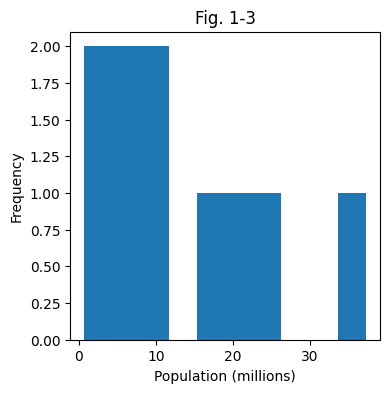

In [65]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
ax.set_title('Fig. 1-3')

El histograma que se muestra en la figura de arriba (Figura 1-3) se trazan de tal manera que:

- Se incluyen bins vacíos en el gráfico.
- Los bins tienen el mismo ancho.
- El número de bins (o, de manera equivalente, el tamaño del bin) depende del usuario.
- Las barras son contiguas—no hay espacio vacío entre las barras, a menos que haya un bin vacío.


## <font color=violet>Momentos Estadísticos</font>
***

En la teoría estadística, la ubicación y la variabilidad se refieren a los primeros y segundos momentos de una distribución. Los terceros y cuartos momentos se denominan asimetría (`skewness`) y curtosis (`kurtosis`). La asimetría se refiere a si los datos están sesgados hacia valores más grandes o más pequeños, y la curtosis indica la propensión de los datos a tener valores extremos. Generalmente, no se utilizan métricas para medir la asimetría y la curtosis; en su lugar, se descubren a través de representaciones visuales como las Figuras 1-2 y 1-3.

## <font color=violet>Gráficas de Densidad y Estimaciones</font>
***

Relacionado con el histograma está la gráfica de densidad, que muestra la distribución de los valores de los datos como una línea continua. Una gráfica de densidad puede considerarse como un histograma suavizado, aunque típicamente se calcula directamente a partir de los datos a través de una estimación de densidad del kernel (KDE). La Figura 1-4 muestra una estimación de densidad superpuesta a un histograma.


Pandas proporciona el método `density` para crear una gráfica de densidad. Use el argumento `bw_method` para controlar la suavidad de la curva de densidad:

In [68]:
state=pd.read_csv('Datos/state87.csv')
print(state.columns)
state.head(4)

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR


Text(0.5, 1.0, 'Fig 1-4')

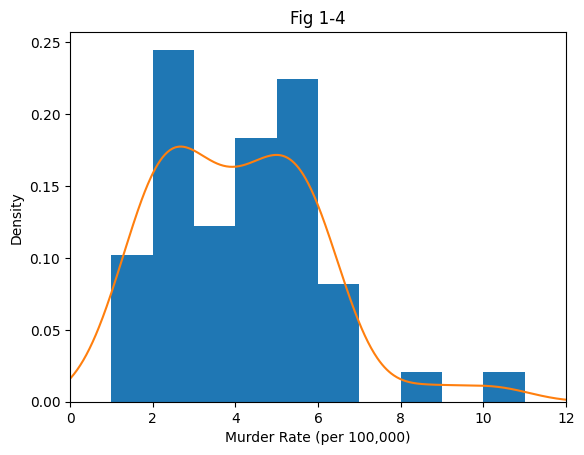

In [69]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
# Las funciones de trazado a menudo toman un argumento opcional de eje (ax), 
# lo que hará que el gráfico se añada al mismo plot (histograma).

ax.set_xlabel('Murder Rate (per 100,000)')
ax.set_title('Fig 1-4')


# <font color=green>Histograma vs Gráfica de Densidad</font>
***

![Histograma vs Gráfica de Densidad](Datos/histograma_densidad.png)

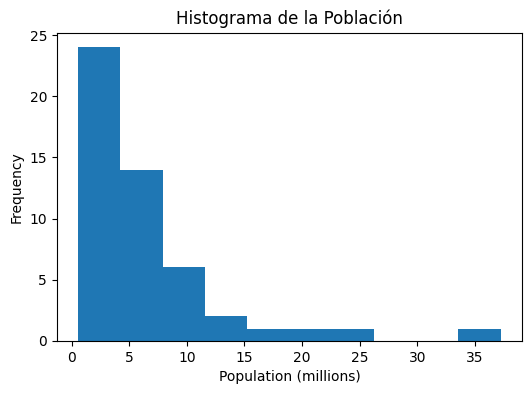

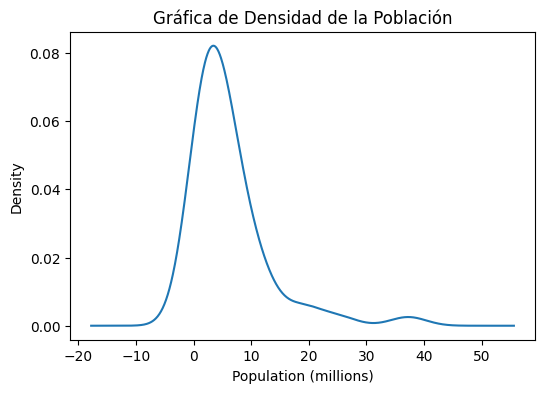

In [71]:
# Crear el histograma
ax_hist = (state['Population'] / 1_000_000).plot.hist(figsize=(6, 4))
ax_hist.set_xlabel('Population (millions)')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Histograma de la Población')
plt.show()

# Crear la gráfica de densidad
ax_density = (state['Population'] / 1_000_000).plot.density(figsize=(6, 4))
ax_density.set_xlabel('Population (millions)')
ax_density.set_ylabel('Density')
ax_density.set_title('Gráfica de Densidad de la Población')
plt.show()

### Resumen
Un histograma de frecuencias traza los conteos de frecuencia en el eje y y los valores de la variable en el eje x; proporciona una idea de la distribución de los datos de un vistazo.
- Una tabla de frecuencias es una versión tabular de los conteos de frecuencia que se encuentran en un histograma.
- Un diagrama de ca en cambio, a, con la parte superior e inferior de la caja en los percentiles 75 y 25, respectivamente, también proporciona una idea rápida de la distribución de los datos; a menudo se utiliza en pantallas lado a lado para comparar distribuciones.
- Una gráfica de densidad es una versión suavizada de un histograma; requiere una función para estimar una gráfica basada en los datos (por supuesto, son posibles múltiples estimaciones).


# <font color=green>Representación de Datos Binarios y Categóricos</font>
***

### Términos Clave para Explorar Datos Categóricos

**Moda**  
La categoría o valor que ocurre con mayor frecuencia en un conjunto de datos.

**Valor Esperado**  
Cuando las categorías pueden asociarse con un valor numérico, esto proporciona un valor promedio basado en la probabilidad de ocurrencia de una categoría.

**Gráficos de Barras**  
La frecuencia o proporción de cada categoría trazada como barras.

**Gráficos de Pastel**  
La frecuencia o proporción de cada categoría trazada como cuñas en un pastel.


### Tabla 1-6. Porcentaje de retrasos por causa en el Aeropuerto de Dallas/Fort Worth

| Carrier | ATC   | Weather | Security | Inbound |
|---------|-------|---------|----------|---------|
| 23.02%  | 30.40%| 4.03%   | 0.12%    | 42.43%  |


In [74]:
dfw = pd.read_csv('Datos/dfw_airline.csv')
display(100 * dfw / dfw.values.sum())

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


- **Carrier (Transportista)**:
  - Esta columna muestra el porcentaje de retrasos causados por factores bajo el control de la aerolínea o transportista. Esto puede incluir problemas operacionales, personal, mantenimiento, etc. En este caso, el 23.02% de los retrasos son atribuibles al transportista.

- **ATC (Control de Tráfico Aéreo)**:
  - Esta columna representa el porcentaje de retrasos causados por el sistema de control de tráfico aéreo. Estos retrasos pueden ocurrir debido a congestión en el espacio aéreo, problemas de gestión del tráfico aéreo, etc. Aquí, el 30.40% de los retrasos son debido a ATC.

- **Weather (Clima)**:
  - Esta columna indica el porcentaje de retrasos causados por condiciones meteorológicas adversas, como tormentas, niebla, nieve, etc. En este caso, el 4.03% de los retrasos son atribuibles al clima.

- **Security (Seguridad)**:
  - Esta columna muestra el porcentaje de retrasos causados por medidas de seguridad, como inspecciones adicionales, procedimientos de seguridad, amenazas de seguridad, etc. En este caso, el 0.12% de los retrasos son debido a problemas de seguridad.

- **Inbound (Aeronave Entrante)**:
  - Esta columna representa el porcentaje de retrasos causados por la llegada tardía de la aeronave entrante. Esto puede suceder si un vuelo anterior llega tarde, afectando la salida programada del siguiente vuelo. Aquí, el 42.43% de los retrasos son debido a aeronaves entrantes tardías.

Los gráficos de barras (bar charts), las categorías se enumeran en el eje x y las frecuencias o proporciones en el eje y. Pandas también admite gráficos de barras para data frames:

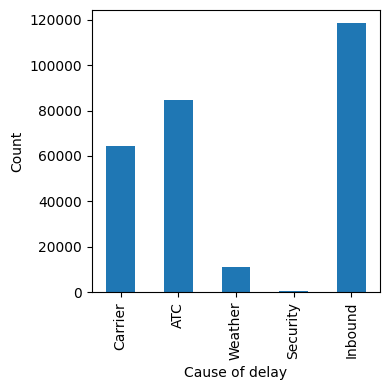

Text(0.5, 1.0, 'Fig 1-5')

In [75]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()
ax.set_title('Fig 1-5')

## <font color=violet>Moda</font>
***

La moda es el valor—o valores simple para datos categóricos y, en general, no se utiliza para datos numéricos.

## <font color=violet>Valor Esperado</font>
***

Un tipo especial de datos categóricos es aquel en el que las categorías representan o pueden asignarse a valores discretos en la misma escala.

### Valor Esperado

El valor esperado se calcula de la siguiente manera:
1. Multiplicar cada resultado por su probabilidad de ocurrencia.
2. Sumar estos valores.



El valor esperado es una medida fundamental en probabilidad y estadísticas que se utiliza para predecir el resultado promedio de un conjunto de eventos probabilísticos. Se calcula ponderando cada posible resultado por su probabilidad de ocurrencia y sumando estos valores ponderados.

#### Pasos para Calcular el Valor Esperado

1. **Identificar los Resultados y sus Probabilidades**:
   - Cada posible resultado de un experimento o evento debe tener una probabilidad asociada.

2. **Multiplicar Cada Resultado por su Probabilidad de Ocurrencia**:
   - Para cada resultado, multiplicamos su valor por la probabilidad de que ocurra.

3. **Sumar los Valores Ponderados**:
   - Sumamos todos los valores ponderados obtenidos en el paso anterior para obtener el valor esperado.

### Ejemplo Detallado: Juego de Lotería

Supongamos que estamos analizando un simple juego de lotería. El costo de un boleto es $10, y hay tres posibles premios:
- Un premio de \$100 con una probabilidad de 1\%.
- Un premio de \$50 con una probabilidad de 2\%.
- Un premio de \$20 con una probabilidad de 5\%.
- No ganar nada con una probabilidad de 92\%.

Queremos calcular el valor esperado de las ganancias por boleto.

In [76]:
premios = [100, 50, 20, 0]
probabilidades = [0.01, 0.02, 0.05, 0.92]

#### Paso 1: Identificar los Resultados y sus Probabilidades

- Ganar \$100: Probabilidad = 0.01
- Ganar \$50: Probabilidad = 0.02
- Ganar \$20: Probabilidad = 0.05
- Ganar \$0: Probabilidad = 0.92

3.0

#### Paso 2: Multiplicar Cada Resultado por su Probabilidad de Ocurrencia

| Ganancia ponderada por ganar | Fórmula              |
|:-----------------------------:|:---------------------:|
| \$100                        | \[ 100 \times 0.01 = 1 \]  |
| \$50                         | \[ 50 \times 0.02 = 1 \]   |
| \$20                         | \[ 20 \times 0.05 = 1 \]   |
| \$0                          | \[ 0 \times 0.92 = 0 \]    |


#### Paso 2: Multiplicar Cada Resultado por su Probabilidad de Ocurrencia

- Ganancia ponderada por ganar \$100:

- Ganancia ponderada por ganar \$50:

- Ganancia ponderada por ganar \$20:

- Ganancia ponderada por ganar \$0:


|         |          |
|:-------:|:--------:|
| \[ 100 \times 0.01 = 1 \] | 
| \[ 50 \times 0.02 = 1 \] |
| \[ 20 \times 0.05 = 1 \] |
| \[ 0 \times 0.92 = 0 \] |


#### Paso 3: Sumar los Valores Ponderados

Sumamos todas las ganancias ponderadas para obtener el valor esperado:
| Cálculo                               | Resultado                  |
|:-------------------------------------:|:---------------------------:|
| Suma de todas las ganancias ponderadas | \[ EV = 1 + 1 + 1 + 0 = 3 \] |
| Ganancia neta esperada (después de restar el costo del boleto) | \[ EV_{\text{neto}} = 3 - 10 = -7 \] |


In [80]:
valor_esperado = sum([premio * probabilidad for premio, probabilidad in zip(premios, probabilidades)])
valor_esperado

3.0

### Interpretación del Resultado

El valor esperado neto de `-7 dolares` significa que, en promedio, se espera perder \$7 por cada boleto comprado en este juego de lotería. Aunque es posible ganar dinero, las probabilidades están estructuradas de tal manera que las pérdidas promedio superan las ganancias promedio.

## <font color=violet>Aplicación del Valor Esperado en Negocios</font>
***

El valor esperado se utiliza ampliamente en negocios y finanzas para la toma de decisiones. Algunos ejemplos incluyen:
- **Valoración de Proyectos**: Estimar los ingresos esperados de un nuevo proyecto o inversión.
- **Gestión de Riesgos**: Calcular el valor esperado de pérdidas en escenarios de riesgo.
- **Planificación de Presupuestos**: Prever los costos y beneficios futuros esperados para la planificación financiera.

El valor esperado es una herramienta poderosa que ayuda a tomar decisiones informadas basadas en probabilidades y resultados ponderados.

## <font color=violet>Correlación</font>
***

El análisis exploratorio de datos  `EDA` en muchos proyectos de modelado (ya sea en ciencia de datos o en investigación) implica examinar la correlación entre predictores y una variable objetivo.

### Términos Clave para la Correlación

**Coeficiente de Correlación**
Una métrica que mide la magnitud en la que las variables numéricas están asociadas entre sí (rango de –1 a +1).

El coeficiente de correlación es una métrica que cuantifica la relación entre dos variables numéricas, se usa para determinar tanto la fuerza como la dirección de la relación lineal entre las variables.

#### Valores del Coeficiente de Correlación

- **+1**: Indica una correlación perfectamente positiva. A medida que una variable aumenta, la otra también aumenta en proporción constante. Todos los puntos en un gráfico de dispersión caerían exactamente en una línea recta ascendente.
- **0**: Indica que no hay correlación lineal entre las variables. Los puntos en un gráfico de dispersión estarían dispersos de manera que no formarían ningún patrón lineal.
- **-1**: Indica una correlación perfectamente negativa. A medida que una variable aumenta, la otra disminuye en proporción constante. Todos los puntos en un gráfico de dispersión caerían exactamente en una línea recta descendente.

#### Interpretación de la Magnitud del Coeficiente de Correlación

- **0.9 a 1.0 (o -0.9 a -1.0)**: Correlación muy fuerte
- **0.7 a 0.9 (o -0.7 a -0.9)**: Correlación fuerte
- **0.5 a 0.7 (o -0.5 a -0.7)**: Correlación moderada
- **0.3 a 0.5 (o -0.3 a -0.5)**: Correlación débil
- **0.0 a 0.3 (o 0.0 a -0.3)**: Correlación muy débil o inexistente

### <font color=ciao>Fórmula del Coeficiente de Correlación de Pearson</font>
***

El coeficiente de correlación más comúnmente usado es el coeficiente de correlación de Pearson, que se calcula usando la siguiente fórmula:

\[
\begin{array}{l}
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
\end{array}
\]

donde:

- \( r \) es el coeficiente de correlación de Pearson.
- \( x_i \) y \( y_i \) son los valores individuales de las variables \( X \) e \( Y \).
- \( \bar{x} \) y \( \bar{y} \) son las medias de las variables \( X \) e \( Y \), respectivamente.



**Matriz de Correlación**
Una tabla donde las variables se muestran tanto en las filas como en las columnas, y los valores de las celdas son las correlaciones entre las variables.  

La Tabla 1-7, llamada matriz de correlación, muestra la correlación entre los rendimientos diarios de las acciones de telecomunicaciones desde julio de 2012 hasta junio de 2015. En la tabla, se puede ver que Verizon (VZ) y ATT (T) tienen la correlación más alta. Level 3 (LVLT), que es una empresa de infraestructura, tiene la correlación más baja con las demás. Nota la diagonal de 1s (la correlación de una acción consigo misma es 1) y la redundancia de la información por encima y por debajo de la diagonal.

### Tabla 1-7. Correlación entre los rendimientos de las acciones de telecomunicaciones

|       | T     | CTL   | FTR   | VZ    | LVLT  |
|-------|-------|-------|-------|-------|-------|
| **T**   | 1.000 | 0.475 | 0.328 | 0.678 | 0.279 |
| **CTL** | 0.475 | 1.000 | 0.420 | 0.417 | 0.287 |
| **FTR** | 0.328 | 0.420 | 1.000 | 0.287 | 0.260 |
| **VZ**  | 0.678 | 0.417 | 0.287 | 1.000 | 0.242 |
| **LVLT**| 0.279 | 0.287 | 0.260 | 0.242 | 1.000 |



La Tabla 1-7 muestra la correlación entre los rendimientos diarios de varias acciones de telecomunicaciones. A continuación se explican las siglas de las empresas que aparecen en la tabla:

- **T**: AT&T Inc.
  - AT&T es una de las compañías de telecomunicaciones más grandes del mundo, ofreciendo servicios de telefonía fija y móvil, así como servicios de internet y televisión.

- **CTL**: CenturyLink, Inc.
  - CenturyLink, ahora conocido como Lumen Technologies, es una empresa de telecomunicaciones que proporciona servicios de voz, datos y video en todo el mundo.

- **FTR**: Frontier Communications Corporation
  - Frontier Communications es una empresa de telecomunicaciones que ofrece servicios de voz, banda ancha y video, principalmente en áreas rurales y suburbanas de los Estados Unidos.

- **VZ**: Verizon Communications Inc.
  - Verizon es una empresa de telecomunicaciones que proporciona servicios de comunicación y tecnología, incluyendo servicios de telefonía móvil y fija, internet y televisión.

- **LVLT**: Level 3 Communications, Inc.
  - Level 3 Communications, ahora parte de CenturyLink (Lumen Technologies), es una empresa de infraestructura que ofrece servicios de red y datos a empresas, gobiernos y otros operadores de telecomunicaciones.

Estas siglas representan algunas de las principales compañías de telecomunicaciones, y la tabla muestra cómo los rendimientos diarios de sus acciones están correlacionados entre sí.  

Una tabla de correlaciones como la Tabla 1-7 se traza comúnmente para mostrar visualmente la relación entre múltiples variables. La Figura 1-6 muestra la correlación entre los rendimientos diarios de los principales fondos cotizados en bolsa (ETFs). El siguiente código demuestra esto utilizando el paquete `seaborn.heatmap`. 


In [84]:
import seaborn as sns
sp500_sym = pd.read_csv('Datos/sp500_sectors.csv')
sp500_px = pd.read_csv('Datos/sp500_data.csv', index_col=0)

In [87]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
display(telecom)

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


A continuación, nos enfocamos en los fondos negociados en las principales bolsas (sector == 'etf').


In [89]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
display(etfs.head())

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


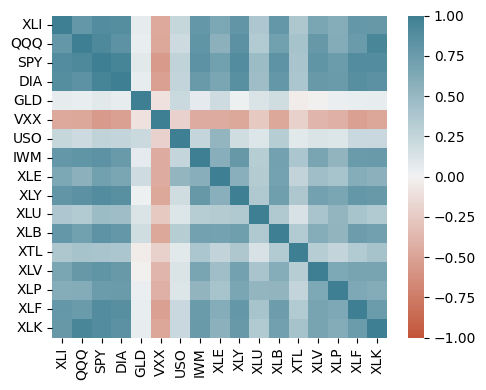

In [90]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

Los ETFs para el S&P 500 (SPY) y el índice Dow Jones (DIA) tienen una alta correlación. Del mismo modo, el QQQ y el XLK, compuestos principalmente por empresas tecnológicas, están positivamente correlacionados. Los ETFs defensivos, como los que rastrean los precios del oro (GLD), los precios del petróleo (USO) o la volatilidad del mercado (VXX), tienden a estar débilmente o negativamente correlacionados con los otros ETFs. 

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_19736\1398409197.py:39: UserWarning: Adding colorbar to a different Figure <Figure size 500x400 with 2 Axes> than <Figure size 500x400 with 2 Axes> which fig.colorbar is called on.
  cb = fig.colorbar(m, ax=ax)


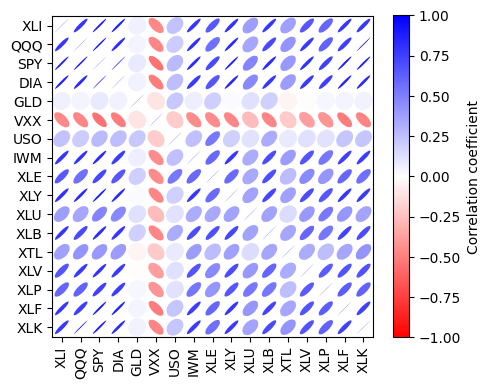

In [92]:
import numpy as np
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

La orientación de la elipse indica si dos variables están positivamente correlacionadas (la elipse apunta hacia la parte superior derecha) o negativamente correlacionadas (la elipse apunta hacia la parte superior izquierda). El sombreado y el ancho de la elipse indican la fuerza de la asociación: las elipses más delgadas y oscuras corresponden a relaciones más fuertes.


Al igual que la media y la desviación estándar, el coeficiente de correlación es sensible a los valores atípicos en los datos. Los paquetes de software ofrecen alternativas robustas al coeficiente de correlación clásico.Los métodos en el módulo sklearn.covariance de scikit-learn implementan una variedad de enfoques.


Los estadísticos propusieron otros tipos de coeficientes de correlación, como el rho de Spearman o el tau de Kendall. Estos son coeficientes de correlación basados en el rango de los datos.Los rangos son posiciones de los datos cuando se ordenan de menor a mayor. Dado que trabajan con rangos en lugar de valores, estas estimaciones son robustas frente a valores atípicos y pueden manejar ciertos tipos de no linealidades. Sin embargo, los científicos de datos generalmente pueden ceñirse al coeficiente de correlación de Pearson y sus alternativas robustas para el análisis exploratorio. El atractivo de las estimaciones basadas en rangos es principalmente para conjuntos de datos más pequeños y pruebas de hipótesis específicas.


**Gráfico de Dispersión (Scatterplot)**
Un gráfico en el que el eje x representa el valor de una variable, y el eje y representa el valor de otra variable. Vea la Figura 1-7 para un gráfico de la correlación entre los rendimientos diarios de ATT y Verizon.

Los gráficos de dispersión simples son compatibles con pandas. Especificar el marcador como `$\u25EF$` usa un círculo abierto para cada punto.


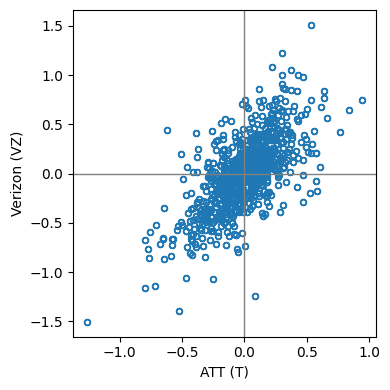

Text(0.5, 1.0, 'Fig 1-7')

In [93]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()
ax.set_title('Fig 1-7')